Textbook has a statement: Every visit methods of value estimation are biased. \
Checking this using MDP from Ex 5.5 \
\
MDP with single nonterminal state and single action that transitions back to nonterminal state with probability p and transitions to terminal state with probability 1-p. Reward +1 on all transitions, gamma=1.

In [44]:
import random
import numpy as np
import matplotlib.pyplot as plt

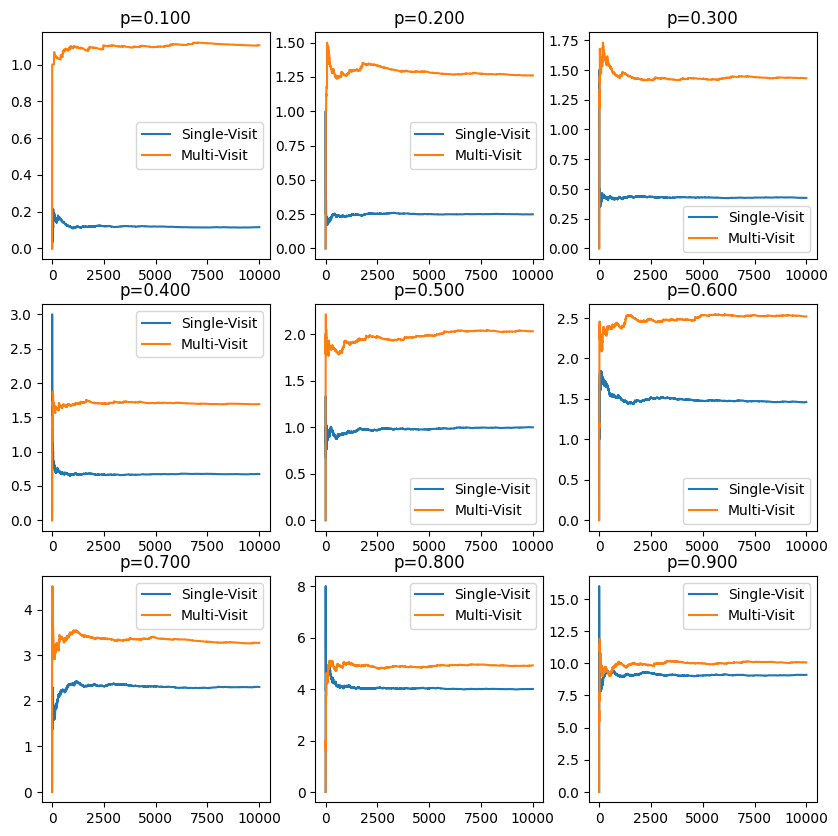

In [56]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes_single_array = [a for line in axes for a in line]

for ax, p in zip(axes_single_array, np.linspace(0.1, 0.9, 9)):
    # First-Visit Method

    v = 0
    past_v = [v]
    v_count = 0

    eposiodes_count = 10000

    for episode in range(1, eposiodes_count+1):
        g = 0
        while random.choices((True, False), (p, 1-p))[0]:
            g += 1

        v = v * v_count / (v_count+1) + g / (v_count+1)
        past_v.append(v)

        v_count += 1

    ax.plot(past_v, label='Single-Visit')

    # Every-Visit Method

    v = 0
    past_v = [v]
    v_count = 0

    for episode in range(1, eposiodes_count+1):
        rewards = []
        while random.choices((True, False), (p, 1-p))[0]:
            rewards.append(1)

        for i in range(len(rewards)):
            v = v * v_count / (v_count+1) + sum(rewards[i:]) / (v_count+1)
            
            v_count += 1

        past_v.append(v)

    ax.plot(past_v, label='Multi-Visit')

    ax.set_title(f'p={p:.3f}')
    ax.legend()

plt.show()

Yep, Every-Visit Method is biased!